In [1]:
#%pylab inline
%matplotlib inline
from array import array
import numpy as np
from numpy.random import RandomState
import matplotlib.pyplot as plt
from root_numpy.tmva import add_classification_events, evaluate_reader
from ROOT import TMVA, TFile, TCut
# Classify the test dataset with the classifier
reader = TMVA.Reader()
from root_numpy import root2array, rec2array
from sklearn.metrics import roc_curve, auc
from sklearn.metrics.ranking import _binary_clf_curve

tree_prefix = '/Users/pigard/CMS/ZZ_analysis/'

branch_names = ['m_jj', 
                'dEta_tj', 
                'm_4l',
                'Z1_zepp', 
                'Z2_zepp', 
                'dPhi_Z1_Z2', 
                'tj1_eta_x_tj2_eta', 
                'costhetastar', 
                'phi', 
                'costheta1', 
                'costheta2', 
                'phi1',
                'vbf_costhetastar',
                'vbf_costheta1',
                'vbf_costheta2',
                'vbf_phi',
                'vbf_phi1',
                'qv1',
                'qv2',      
               ]
signal = root2array(tree_prefix + 'EWK3_BLS.root',
                    "test",
                    branch_names)
signal = rec2array(signal)

backgr = root2array(tree_prefix + 'QCD3_BLS.root',
                    "test",
                    branch_names)
backgr = rec2array(backgr)



Welcome to ROOTaaS 6.05/02


Automatically created module for IPython interactive environment


/Users/pigard/Envs/default_venv/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


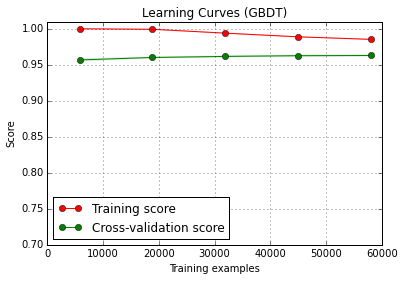

In [2]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn import cross_validation
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.learning_curve import learning_curve


def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and traning learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : integer, cross-validation generator, optional
        If an integer is passed, it is the number of folds (defaults to 3).
        Specific cross-validation objects can be passed, see
        sklearn.cross_validation module for the list of possible objects

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt


#digits = load_digits()
#X, y = digits.data, digits.target

X = np.concatenate((signal, backgr))
y = np.concatenate((np.ones(signal.shape[0]),
                    np.zeros(backgr.shape[0])))

title = "Learning Curves (GBDT)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = cross_validation.ShuffleSplit(X.shape[0], n_iter=10,
                                   test_size=0.2, random_state=0)

from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

estimator = GradientBoostingClassifier(n_estimators=800, learning_rate =.1, max_depth=4, random_state=0)
plot_learning_curve(estimator, title, X, y, ylim=(0.7, 1.01), cv=cv, n_jobs=2)

#title = "Learning Curves (SVM, RBF kernel, $\gamma=0.001$)"
# SVC is more expensive so we do a lower number of CV iterations:
#cv = cross_validation.ShuffleSplit(digits.data.shape[0], n_iter=10,
#                                   test_size=0.2, random_state=0)
#estimator = SVC(gamma=0.001)
#plot_learning_curve(estimator, title, X, y, (0.7, 1.01), cv=cv, n_jobs=4)

plt.show()

In [ ]:
print X.shape[0]


[[  2.12290088e+03  -5.35042095e+00   2.66399170e+02 ...,  -1.59020030e+00
    2.56825470e+02   1.07078133e+02]
 [  1.37791107e+02   1.62326646e+00   5.39447266e+02 ...,   7.21926451e-01
    6.80891190e+01   3.54505280e+02]
 [  3.28988098e+02   2.99861407e+00   2.35266510e+02 ...,  -7.48501122e-01
    6.07471161e+01   1.66099686e+02]
 ..., 
 [  3.24771423e+02   3.66472626e+00   3.63922729e+02 ...,   2.08956289e+00
    2.12689758e+02   4.70374298e+01]
 [  1.23005669e+02   9.92311597e-01   2.31012665e+02 ...,   1.09430516e+00
    1.17780022e+02   1.64137436e+02]
 [  8.24720642e+02   4.21309948e-01   2.61309967e+02 ...,   1.92309821e+00
    6.54270935e+02   1.43441309e+03]]
blubb
[ 1.  1.  1. ...,  0.  0.  0.]


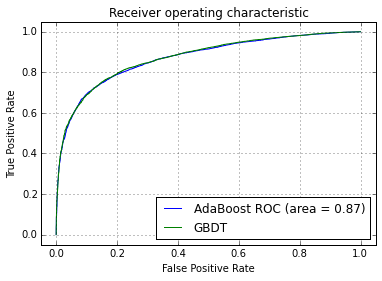

In [2]:


# for sklearn data is usually organised
# into one 2D array of shape (n_samples x n_features)
# containing all the data and one array of categories
# of length n_samples
X = np.concatenate((signal, backgr))
y = np.concatenate((np.ones(signal.shape[0]),
                    np.zeros(backgr.shape[0])))

print X

print 'blubb'

print y

from sklearn.cross_validation import train_test_split

X_dev,X_eval, y_dev,y_eval = train_test_split(X, y,
                                              test_size=0.33, random_state=42)
X_train,X_test, y_train,y_test = train_test_split(X_dev, y_dev,
                                                  test_size=0.33, random_state=492)

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, roc_auc_score

dt = DecisionTreeClassifier(max_depth=3,
                            min_samples_leaf=0.05*len(X_train))
bdt = AdaBoostClassifier(dt,
                         algorithm='SAMME',
                         n_estimators=1200,
                         learning_rate=0.5)

bdt.fit(X_train, y_train)
gbdt = GradientBoostingClassifier(n_estimators=800, learning_rate =.1, max_depth=4, random_state=0)
 
gbdt.fit(X_train, y_train)

from sklearn.externals import joblib
#joblib.dump(bdt, 'bdt_example.pkl')
    
from sklearn.metrics import roc_curve, auc

decisions = bdt.decision_function(X_test)
gbdt_decisions = gbdt.decision_function(X_test)
# Compute ROC curve and area under the curve
fpr, tpr, thresholds = roc_curve(y_test, decisions)
gbdt_fpr, gbdt_tpr, thresholds = roc_curve(y_test, gbdt_decisions)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, lw=1, label='AdaBoost ROC (area = %0.2f)'%(roc_auc))
plt.plot(gbdt_fpr, gbdt_tpr, lw=1, label='GBDT')
#plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Luck')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.grid()
plt.show()


In [ ]:
def varset_training(estimator, sig, back, variable_names = []) :
    out_list = []
    
    for var in variable_names :
        print var
        
        red_back = rec2array(back[var])
        red_sig = rec2array(sig[var])
        
        X = np.concatenate((red_sig, red_back))
        y = np.concatenate((np.ones(sig.shape[0]) ,
                            np.zeros(back.shape[0])))
        
    
        X_dev,X_eval, y_dev,y_eval = train_test_split(X, y,
                                              test_size=0.33, random_state=42)
        X_train,X_test, y_train,y_test = train_test_split(X_dev, y_dev,
                                                  test_size=0.33, random_state=492)
    
        est = copy.deepcopy(estimator)
        est.fit(X_train, y_train)
        
        est_decisions = est.decision_function(X_test)
        est_fpr, est_tpr, thresholds = roc_curve(y_test, est_decisions)
        
        out_list.append((var, est, est_fpr, est_tpr))
    return out_list

In [ ]:
gbdt = GradientBoostingClassifier(n_estimators=800, learning_rate =.1, max_depth=4, random_state=0)
result = varset_training(gbdt, )

In [ ]:
from sklearn.metrics import roc_curve, auc

decisions = bdt.decision_function(X_test)
gbdt_decisions = gbdt.decision_function(X_test)
# Compute ROC curve and area under the curve
fpr, tpr, thresholds = roc_curve(y_test, decisions)
gbdt_fpr, gbdt_tpr, thresholds = roc_curve(y_test, gbdt_decisions)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, lw=1, label='AdaBoost ROC (area = %0.2f)'%(roc_auc))
plt.plot(gbdt_fpr, gbdt_tpr, lw=1, label='GBDT')
plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Luck')
plt.xlim([-0.05, 0.45])
plt.ylim([0.305, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.grid()
plt.show()

In [16]:
import numpy as np
nearest = (np.abs(tpr-.657)).argmin()
print fpr[nearest]


0.085346215781


In [5]:
import numpy as np


plt.plot(fpr, tpr, lw=1, label='AdaBoost BDT')
plt.plot([.127], [.657], marker = 'x',linestyle="None", color='red', label='VBS cuts')
nearest = (np.abs(tpr-.657)).argmin()
plt.plot(fpr[nearest], tpr[nearest], marker = 'o',linestyle="None", color='blue', label='BDT WP')
print fpr[nearest]

plt.locator_params(nbins=10)
plt.locator_params(axis='y',nbins=20)
#plt.plot(gbdt_fpr, gbdt_tpr, lw=1, label='GBDT')
plt.xlim([-0.0, 0.45])
plt.ylim([-0.05, 1.05])
plt.xlabel('background efficiency')
plt.ylabel('signal efficiency')
#plt.title('Receiver operating characteristic')
plt.legend(loc="best") #lower right
plt.legend(numpoints=1)
plt.grid()
plt.show()

NameError: name 'fpr' is not defined

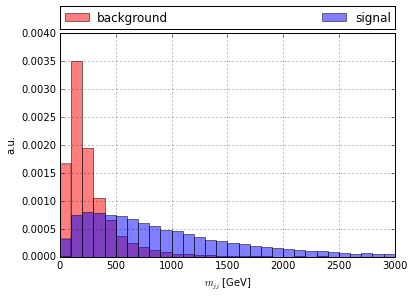

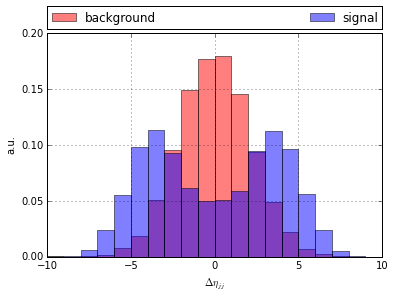

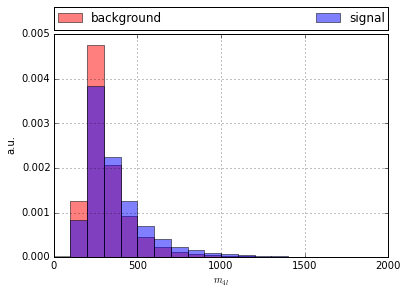

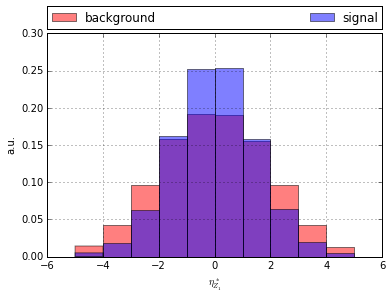

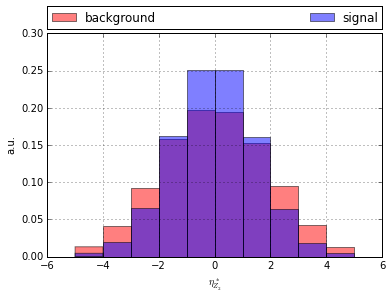

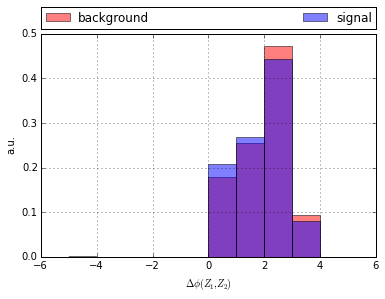

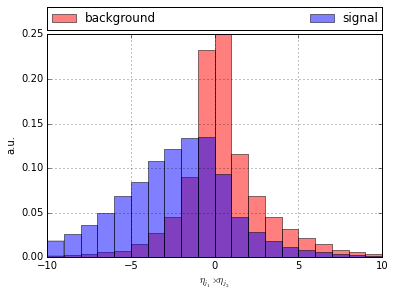

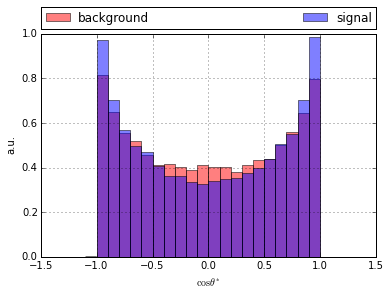

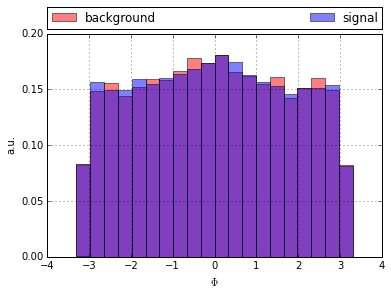

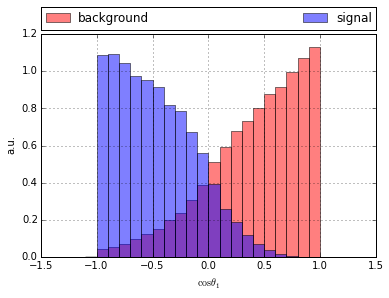

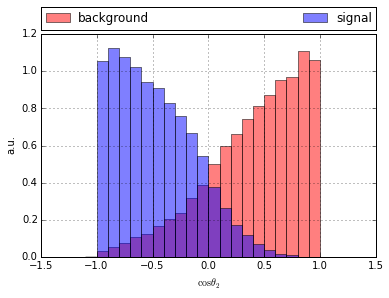

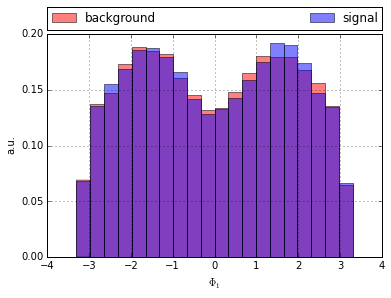

In [7]:
#'costhetastar', 'Phi', 'costheta1', 'costheta2', 'Phi1'
plots = [(r'$m_{jj}$ [GeV]', 30 , [0, 3000]),
         (r'$\Delta\eta_{jj}$', 20, [-10, 10]),
         (r'$m_{4l}$', 20, [0, 2000]),
         (r'$\eta^{*}_{Z_{1}}$', 10, [-5, 5]),
         (r'$\eta^{*}_{Z_{2}}$', 10, [-5, 5]),
         (r'$\Delta\phi(Z_{1}, Z_{2})$', 10, [-5,5]),
         (r'$\eta_{j_{1}}\times\eta_{j_{2}}$', 20, [-10, 10]),
         (r'$\cos{\theta^*}$', 22, [-1.1, 1.1]),
         (r'$\Phi$', 20, [-3.3, 3.3]),
         (r'$\cos \theta_1$', 22, [-1.1, 1.1]),
         (r'$\cos \theta_2$', 22, [-1.1, 1.1]),
         (r'$\Phi_1$', 20, [-3.3, 3.3]),
        ]
#fig = plt.figure()

 #'m_4l','Z1_zepp', 'Z2_zepp', 'dPhi_Z1_Z2', 'tj1_eta_x_tj2_eta'
#plt.subplots(2, 3)
for i in range(len(plots)) :
    #, i+1)
    p = plots[i]
    plt.hist(backgr[:,i], bins=p[1], range=p[2], normed=1, lw=1, alpha=0.5, color = 'red', label='background')
    plt.hist(signal[:,i], bins=p[1], range=p[2], normed=1, lw=1, alpha=0.5, label='signal')
#plt.locator_params(nbins=10)
#plt.locator_params(axis='y',nbins=20)
#plt.plot(gbdt_fpr, gbdt_tpr, lw=1, label='GBDT')
#plt.xlim([-0.0, 0.45])
#plt.ylim([-0.05, 1.05])
    plt.xlabel(p[0])
    plt.ylabel('a.u.')
    #plt.title('Receiver operating characteristic')
    #plt.legend(loc="best")
    plt.legend().set_visible(False)
    plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=2, mode="expand", borderaxespad=0.)
    #plt.legend(numpoints=1)
    plt.grid()
    plt.show()

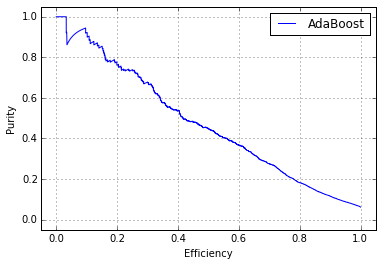

In [4]:
signal_xsecion = 0.29
background_xsection = 4.37

purity = tpr * signal_xsecion / (tpr * signal_xsecion + fpr * background_xsection)

plt.plot(tpr, purity, lw=1, label='AdaBoost')
#plt.plot(gbdt_fpr, gbdt_tpr, lw=1, label='GBDT')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('Efficiency')
plt.ylabel('Purity')
#plt.title('Receiver operating characteristic')
plt.legend(loc='best')
plt.grid()
plt.show()

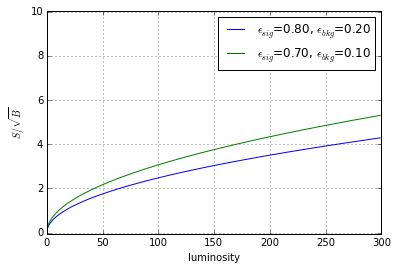

In [5]:
luminosity = np.arange(0, 300)

signal_eff = 0.8
background_eff = 0.2

signal_eff_2 = 0.7
background_eff_2 = 0.1

S_over_root_B = signal_eff * signal_xsecion / (background_eff * background_xsection)**0.5 * luminosity**0.5
S_over_root_B_2 = signal_eff_2 * signal_xsecion / (background_eff_2 * background_xsection)**0.5 * luminosity**0.5


plt.plot(luminosity,S_over_root_B, lw=1, label=r'$\epsilon_{sig}$=%0.2f, $\epsilon_{bkg}$=%0.2f'%(signal_eff, background_eff))
plt.plot(luminosity,S_over_root_B_2, lw=1, label=r'$\epsilon_{sig}$=%0.2f, $\epsilon_{bkg}$=%0.2f'%(signal_eff_2, background_eff_2))


#plt.plot(gbdt_fpr, gbdt_tpr, lw=1, label='GBDT')
plt.xlim([-0.05, 300.05])
plt.ylim([-0.05, 10.05])
plt.xlabel('luminosity')
plt.ylabel(r'$S / \sqrt{B}$')
#plt.title('Receiver operating characteristic')
plt.legend(loc='best')
plt.grid()
plt.show()

/Users/pigard/Envs/default_venv/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


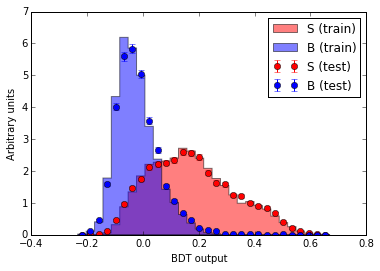

In [6]:
def compare_train_test(clf, X_train, y_train, X_test, y_test, bins=30):
    decisions = []
    for X,y in ((X_train, y_train), (X_test, y_test)):
        d1 = clf.decision_function(X[y>0.5]).ravel()
        d2 = clf.decision_function(X[y<0.5]).ravel()
        decisions += [d1, d2]
        
    low = min(np.min(d) for d in decisions)
    high = max(np.max(d) for d in decisions)
    low_high = (low,high)
    
    plt.hist(decisions[0],
             color='r', alpha=0.5, range=low_high, bins=bins,
             histtype='stepfilled', normed=True,
             label='S (train)')
    plt.hist(decisions[1],
             color='b', alpha=0.5, range=low_high, bins=bins,
             histtype='stepfilled', normed=True,
             label='B (train)')

    hist, bins = np.histogram(decisions[2],
                              bins=bins, range=low_high, normed=True)
    scale = len(decisions[2]) / sum(hist)
    err = np.sqrt(hist * scale) / scale
    
    width = (bins[1] - bins[0])
    center = (bins[:-1] + bins[1:]) / 2
    plt.errorbar(center, hist, yerr=err, fmt='o', c='r', label='S (test)')
    
    hist, bins = np.histogram(decisions[3],
                              bins=bins, range=low_high, normed=True)
    scale = len(decisions[2]) / sum(hist)
    err = np.sqrt(hist * scale) / scale

    plt.errorbar(center, hist, yerr=err, fmt='o', c='b', label='B (test)')

    plt.xlabel("BDT output")
    plt.ylabel("Arbitrary units")
    plt.legend(loc='best')
  
#bdt = None
#bdt = joblib.load('bdt_example.pkl') 
compare_train_test(bdt, X_train, y_train, X_test, y_test)


In [ ]:

    test_tree = root2array(tree_prefix + b + tree_postfix, "TestTree", tree_vars)
    train_tree = root2array(tree_prefix + b + tree_postfix, "TrainTree", tree_vars)
    
    test_tree = rec2array(test_tree)
    train_tree = rec2array(train_tree)
    
    full = np.concatenate((test_tree, train_tree))
    print np.shape(full)
    X = full[:,:nVars]
    print np.shape(X)
    
    Y = full[:,nVars + 1]
    print Y
    
    from sklearn.cross_validation import train_test_split
    
    X_dev,X_eval, y_dev,y_eval = train_test_split(X, Y,
                                              test_size=0.33, random_state=42)
    X_train,X_test, y_train,y_test = train_test_split(X, Y,
                                                  test_size=0.5, random_state=492)
    
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
    from sklearn.metrics import classification_report, roc_auc_score

    from sklearn import grid_search
    
    #  NTrees=2000:BoostType=Grad:Shrinkage=0.10:!UseBaggedGrad:nCuts=2000:nEventsMin=100:NNodesMax=5:UseNvars=4:PruneStrength=5:PruneMethod=CostComplexity:MaxDepth=6:NegWeightTreatment=PairNegWeightsGlobal:CreateMVAPdfs");
    dt = DecisionTreeClassifier(max_depth=6,
                            min_samples_leaf=0.05*len(X_train))
    bdt = AdaBoostClassifier(dt,
                         algorithm='SAMME',
                         n_estimators=2000,
                         learning_rate=0.1)

    #bdt.fit(X_train, y_train)
    
    gbdt = GradientBoostingClassifier(n_estimators=2000, learning_rate =.1, max_depth=6, random_state=0)
 
    gbdt.fit(X_train, y_train)
    
    #y_predicted = bdt.predict(X_test)
    #print y_predicted
    
    #decisions = bdt.decision_function(X_test)
    # Compute ROC curve and area under the curve
    #bd_f, bd_t, thresholds = roc_curve(y_test, decisions, pos_label = 1)
    
    tree = root2array(tree_prefix + b + tree_postfix, "TestTree", tree_vars)
    classID = [ x['classID'] for x in tree]
    data = []
    BDT_val = []
    for n in range(len(tree)) :
        row = tree[n]
        row_l = [var for var in row]
        data.append(row_l[:nVars])

    BDT = tree['BDT']
    BDT_val = BDT
    
    for var in BDT_var_names :   
        reader.AddVariable(var, array('f', [0.]))
 
    for spec in BDT_spec_names :
        reader.AddSpectator(spec, array('f', [0.]))
    

    reader.BookMVA('BDT', weight_prefix + b + weight_postfix)    
    BDT_out = evaluate_reader(reader, 'BDT', data)

    #print BDT_out
    #print BDT_val
    
    fpr, tpr, thresholds = roc_curve(classID, BDT_val, pos_label = 0.)
    fpr_sel, tpr_sel, thresholds = roc_curve(classID, BDT_out, pos_label = 0)

    beff, seff, t = roc_curve_eff(classID, BDT_val, pos_label = 0.)
    
    roc_auc = auc(fpr, tpr)
    roc_auc_sel = auc(fpr_sel, tpr_sel)

    print 'beff', beff
    print 'seff', seff
    
    print 'fpr', fpr
    print 'tpr', tpr
    
    plt.plot(beff, seff, lw=1, color=(0.0, 1.0, 0.0), label='triggering eff')
    #plt.plot(bd_f, bd_t, lw=1, color=(0.0, 0.0, 1.0), label='SK DT')
    #plt.plot(fpr, tpr, lw=1, label='triggering (area = %0.2f)'%(roc_auc))
    plt.plot(fpr_sel, tpr_sel, lw=1, color=(1.0, 0.0, 0.0), label='non-triggering (area = %0.2f)'%(roc_auc_sel))


    #plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Luck')
    plt.xlim([-0.05, 1.])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.grid()
    plt.show()

bd_f, bd_t, thresholds = roc_curve(y_test, decisions, pos_label = 1.)
plt.plot(bd_f, bd_t, lw=1, color=(0.0, 0.0, 1.0), label='SK DT')
plt.show()
print y_test
print decisions

In [ ]:
print np.shape(X_train)

In [ ]:
    gbdt_decisions = gbdt.decision_function(X_test)
    # Compute ROC curve and area under the curve
    gbd_f, gbd_t, thresholds = roc_curve(y_test, gbdt_decisions, pos_label = 1)
    
    plt.plot(beff, seff, lw=1, color=(0.0, 1.0, 0.0), label='triggering eff')
    #plt.plot(bd_f, bd_t, lw=1, color=(0.0, 0.0, 1.0), label='SK DT')
    plt.plot(gbd_f, gbd_t, lw=1, color='black', label='SK GBDT')
    #plt.plot(fpr, tpr, lw=1, label='triggering (area = %0.2f)'%(roc_auc))
    plt.plot(fpr_sel, tpr_sel, lw=1, color=(1.0, 0.0, 0.0), label='non-triggering (area = %0.2f)'%(roc_auc_sel))


    #plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Luck')
    plt.xlim([0.0, 0.4])
    plt.ylim([0.7, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.grid()
    plt.show()

In [ ]:
gbdt2 = GradientBoostingClassifier(n_estimators=800, learning_rate =.1, max_depth=6, random_state=0)
 
gbdt2.fit(X_train, y_train)  
    
    #factory->BookMethod(TMVA::Types::kBDT, "BDT",
   #           "!H:!V:NTrees=2000:BoostType=Grad:Shrinkage=0.10:!UseBaggedGrad:nCuts=2000:nEventsMin=100:NNodesMax=5:UseNvars=4:PruneStrength=5:PruneMethod=CostComplexity:MaxDepth=6:NegWeightTreatment=PairNegWeightsGlobal:CreateMVAPdfs");

In [ ]:
    gbdt_decisions = gbdt.decision_function(X_test)
    # Compute ROC curve and area under the curve
    gbd_f, gbd_t, thresholds = roc_curve(y_test, gbdt_decisions, pos_label = 1)
    gbdt2_decisions = gbdt2.decision_function(X_test)
    # Compute ROC curve and area under the curve
    gbd2_f, gbd2_t, thresholds = roc_curve(y_test, gbdt2_decisions, pos_label = 1)
    
    plt.plot(beff, seff, lw=1, color=(0.0, 1.0, 0.0), label='triggering eff')
    plt.plot(gbd2_f, gbd2_t, lw=1, color='red', label='SK 2')
    plt.plot(gbd_f, gbd_t, lw=1, color='black', label='SK GBDT')
    #plt.plot(fpr, tpr, lw=1, label='triggering (area = %0.2f)'%(roc_auc))
    #plt.plot(fpr_sel, tpr_sel, lw=1, color=(1.0, 0.0, 0.0), label='non-triggering (area = %0.2f)'%(roc_auc_sel))


    #plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Luck')
    plt.xlim([-0.05, 0.4])
    plt.ylim([0.7, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.grid()
    plt.show()